In [11]:
import torch
import gradientUtils as gu
# Define a threshold for early stopping
threshold = 1e-10
circle_center = torch.tensor([5.0, 5.0])  # Example circle center
radius = 3.0  # Example radius
alpha = 0.1  # Learning rate
delta = 1e-5

In [12]:
import matplotlib.pyplot as plt
def plot_values(list1, list2, title='Plot of Two Lists', xlabel='X-axis', ylabel='Y-axis', list1_label='List 1', list2_label='List 2'):
    plt.figure()
    
    # Plot the first list
    plt.plot(list1, label=list1_label, marker='o')
    
    # Plot the second list
    plt.plot(list2, label=list2_label, marker='x')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add a legend
    plt.legend()
    #plt.ylim(-2,10)
    # Show the plot
    plt.grid(True)
    plt.show()

### TrueSDF

In [2]:
def truesdf_optimizer(p1, p2, p3, circle_center, radius, destination, true_loss_values):
    prev_loss = float("inf")
    # Define the optimizer
    optimizer = torch.optim.Adam([p1, p2, p3], lr=0.01)

    # Optimization loop
    for step in range(100000):
        optimizer.zero_grad()
        
        # Compute the point (x, y) from the source points and weights
        x,y = gu.compute_vertex(p1, p2, p3)
        
        # Calculate the SDF value at the current point
        vertex_loss = gu.circle_sdf(x,y, circle_center, radius)**2
        print(f'Vertex Loss: {vertex_loss.item()}')
        # Calculate the SDF values of the midpoints
        midpoint_loss = gu.midpoint_loss_sdf(p1, p2, p3, circle_center, radius)
        # Define the loss as the squared distance
        loss = vertex_loss + 0.05 * midpoint_loss
        
        # Early stopping condition
        if abs(prev_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {step} due to minimal loss change")
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
            break

        prev_loss = loss.item()
        # Backpropagation
        loss.backward()
        
        # Optimization step
        optimizer.step()
        
        # Print progress every 100 steps
        if step % 100 == 0:
            print(f'Step {step}, Point: {x.item(),y.item()}, Loss: {loss.item()}, distance: {vertex_loss.item()}')
            gu.plot_and_save(step, p1, p2, p3,circle_center, radius, destination=destination)
            true_loss_values.append(loss.item())
    gu.plot_and_save(step, p1, p2, p3, circle_center, radius, destination=destination)
    

In [3]:
circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
true_loss_values = []

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([3.0, 3.0], requires_grad=True)

destination = "images/autograd/truesdf/"

truesdf_optimizer(p1, p2, p3, circle_center, radius, destination, true_loss_values)
# Final optimized point
x,y = gu.compute_vertex(p1, p2, p3)
print(f'Optimized Point: {x.item(),y.item()}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')

Vertex Loss: 3.3431456089019775
Step 0, Point: (2.0, 2.0), Loss: 3.758983612060547, distance: 3.3431456089019775
Vertex Loss: 3.2916293144226074
Vertex Loss: 3.240523338317871
Vertex Loss: 3.1898369789123535
Vertex Loss: 3.139573574066162
Vertex Loss: 3.0897421836853027
Vertex Loss: 3.0403451919555664
Vertex Loss: 2.9913930892944336
Vertex Loss: 2.9428906440734863
Vertex Loss: 2.8948416709899902
Vertex Loss: 2.8472514152526855
Vertex Loss: 2.80012845993042
Vertex Loss: 2.7534737586975098
Vertex Loss: 2.7072911262512207
Vertex Loss: 2.661588430404663
Vertex Loss: 2.6163673400878906
Vertex Loss: 2.5716309547424316
Vertex Loss: 2.5273826122283936
Vertex Loss: 2.4836249351501465
Vertex Loss: 2.4403610229492188
Vertex Loss: 2.3975932598114014
Vertex Loss: 2.35532283782959
Vertex Loss: 2.3135530948638916
Vertex Loss: 2.272282838821411
Vertex Loss: 2.231513023376465
Vertex Loss: 2.19124698638916
Vertex Loss: 2.151481866836548
Vertex Loss: 2.1122207641601562
Vertex Loss: 2.073460817337036
Vert

In [4]:
true_loss_values_2 = []

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([2.0, 3.0], requires_grad=True)

destination = "images/autograd/truesdf_2/"

truesdf_optimizer(p1, p2, p3, circle_center, radius, destination, true_loss_values_2)
# Final optimized point
x,y = gu.compute_vertex(p1, p2, p3)
print(f'Optimized Point: {x.item(),y.item()}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')

Vertex Loss: 2.747427225112915
Step 0, Point: (2.0, 1.75), Loss: 3.066164255142212, distance: 2.747427225112915
Vertex Loss: 2.6905364990234375
Vertex Loss: 2.6344985961914062
Vertex Loss: 2.579319953918457
Vertex Loss: 2.5250020027160645
Vertex Loss: 2.4715559482574463
Vertex Loss: 2.418985605239868
Vertex Loss: 2.3672921657562256
Vertex Loss: 2.316477060317993
Vertex Loss: 2.2665398120880127
Vertex Loss: 2.2174839973449707
Vertex Loss: 2.169304132461548
Vertex Loss: 2.121999502182007
Vertex Loss: 2.0755629539489746
Vertex Loss: 2.0299923419952393
Vertex Loss: 1.9852814674377441
Vertex Loss: 1.9414232969284058
Vertex Loss: 1.8984097242355347
Vertex Loss: 1.8562345504760742
Vertex Loss: 1.8148910999298096
Vertex Loss: 1.7743656635284424
Vertex Loss: 1.7346482276916504
Vertex Loss: 1.6957318782806396
Vertex Loss: 1.6576056480407715
Vertex Loss: 1.6202540397644043
Vertex Loss: 1.583666443824768
Vertex Loss: 1.5478336811065674
Vertex Loss: 1.5127410888671875
Vertex Loss: 1.47837495803833


### Barycentric_coordinates interpolation

In [5]:
def bary_optimizer(p1, p2, p3, circle_center, radius, destination, mp_lambda, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values):
    # Define the optimizer
    optimizer = torch.optim.Adam([p1, p2, p3], lr=0.1)
    prev_loss = float("inf")

    # Optimization loop
    for step in range(100000):
        optimizer.zero_grad()
        
        sdf_p1 = gu.circle_sdf(p1[0], p1[1], circle_center, radius)
        sdf_p2 = gu.circle_sdf(p2[0], p2[1], circle_center, radius)
        sdf_p3 = gu.circle_sdf(p3[0], p3[1], circle_center, radius)
        # Compute the point (x, y) from the source points and weights
        p = gu.compute_vertex_p(p1, p2, p3)
        
        # Calculate barycentric coordinates of the intersection point
        u, v, w = gu.barycentric_coordinates(p, p1, p2, p3)

        # Calculate the SDF value at the current point
        vertex_loss = (u * sdf_p1 + v * sdf_p2 + w * sdf_p3) ** 2
        print(f'Vertex Loss: {vertex_loss.item()}')
        print(f'difference between interpole and true sdf: {torch.sqrt(vertex_loss) - gu.circle_sdf(x,y, circle_center, radius)}')

        
        # Calculate the SDF values of the midpoints
        midpoint_loss = gu.midpoint_interpolation_sdf(sdf_p1, sdf_p2, sdf_p3)**2

        # Define the loss as the squared distance
        loss = vertex_loss + mp_lambda * midpoint_loss
        
        # Early stopping condition
        if abs(prev_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {step} due to minimal loss change")
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
            break

        prev_loss = loss.item()
        # Backpropagation
        loss.backward()
        
        # Optimization step
        optimizer.step()
        
        # Print progress every 100 steps
        if step % 100 == 0:
            print(f'Step {step}, Point: {x.item(),y.item()}, Loss: {loss.item()}, distance: {vertex_loss.item()}')
            gu.plot_and_save(step, p1, p2, p3,circle_center, radius, destination=destination)
            interpolated_vertex_values.append(torch.sqrt(vertex_loss).item())
            true_vertex_values.append(gu.circle_sdf(p[0].item(),p[1].item(), circle_center, radius).item())

            interpolated_loss_values.append(loss.item())
    gu.plot_and_save(step, p1, p2, p3, circle_center, radius, destination)

In [7]:
import torch
import gradientUtils as gu
circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.05
threshold = 1e-10

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([3.0, 3.0], requires_grad=True)

destination = "images/autograd/barycentric_interpolation/"

interpolated_vertex_values = []
true_vertex_values = []
interpolated_loss_values = []

bary_optimizer(p1, p2, p3, circle_center, radius, destination, mp_lambda, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values)

# Final optimized point
x,y = gu.compute_vertex(p1, p2, p3)
print(f'Optimized Point: {x.item(),y.item()}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')




Vertex Loss: 3.3431456089019775
difference between interpole and true sdf: 1.8284196853637695
Step 0, Point: (0.748065710067749, 0.663635790348053), Loss: 4.139431953430176, distance: 3.3431456089019775


Vertex Loss: 3.2215023040771484
difference between interpole and true sdf: 1.794847011566162
Vertex Loss: 3.0961403846740723
difference between interpole and true sdf: 1.7595778703689575
Vertex Loss: 2.9651432037353516
difference between interpole and true sdf: 1.7219517230987549
Vertex Loss: 2.832956075668335
difference between interpole and true sdf: 1.6831313371658325
Vertex Loss: 2.71958065032959
difference between interpole and true sdf: 1.6491076946258545
Vertex Loss: 2.6655304431915283
difference between interpole and true sdf: 1.632637858390808
Vertex Loss: 2.7175498008728027
difference between interpole and true sdf: 1.6484918594360352
Vertex Loss: 2.912546157836914
difference between interpole and true sdf: 1.706610918045044
Vertex Loss: 3.2875757217407227
difference between interpole and true sdf: 1.8131599426269531
Vertex Loss: 3.8981130123138428
difference between interpole and true sdf: 1.9743565320968628
Vertex Loss: 4.843465805053711
difference between interpole and tru

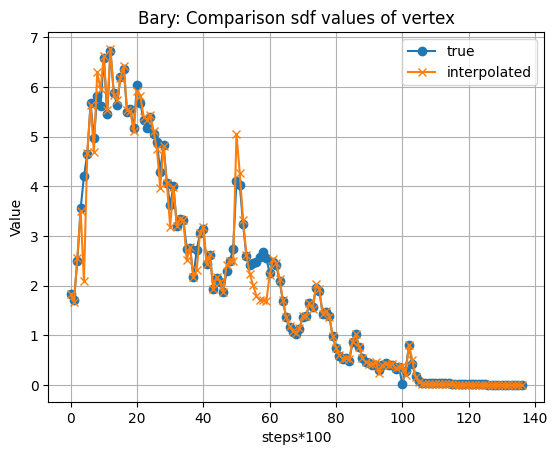

In [8]:
plot_values(true_vertex_values, interpolated_vertex_values, title='Bary: Comparison sdf values of vertex', xlabel='steps*100', ylabel='Value', list1_label='true', list2_label='interpolated')


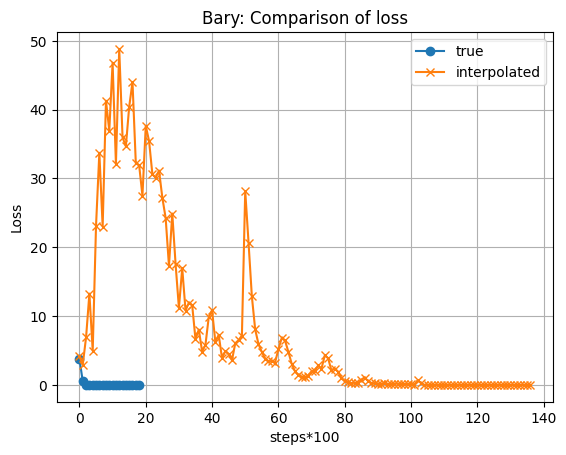

In [9]:
plot_values(true_loss_values, interpolated_loss_values, title='Bary: Comparison of loss', xlabel='steps*100', ylabel='Loss', list1_label='true', list2_label='interpolated')


In [10]:
import torch
import gradientUtils as gu
circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.05
threshold = 1e-10

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([2.0, 3.0], requires_grad=True)

destination = "images/autograd/barycentric_interpolation_2/"

interpolated_vertex_values_2 = []
true_vertex_values_2 = []
interpolated_loss_values_2 = []

bary_optimizer(p1, p2, p3, circle_center, radius, destination, mp_lambda, threshold, interpolated_loss_values_2, interpolated_vertex_values_2, true_vertex_values_2)

# Final optimized point
x,y = gu.compute_vertex(p1, p2, p3)
print(f'Optimized Point: {x.item(),y.item()}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')

Vertex Loss: 3.1763620376586914
difference between interpole and true sdf: 1.7805018424987793
Step 0, Point: (0.4563421607017517, -0.8917518854141235), Loss: 3.850600004196167, distance: 3.1763620376586914
Vertex Loss: 2.7937536239624023
difference between interpole and true sdf: 1.6697192192077637
Vertex Loss: 2.364816188812256
difference between interpole and true sdf: 1.5360625982284546
Vertex Loss: 1.9736223220825195
difference between interpole and true sdf: 1.403123378753662
Vertex Loss: 1.6658998727798462
difference between interpole and true sdf: 1.2889641523361206
Vertex Loss: 1.4253877401351929
difference between interpole and true sdf: 1.1921627521514893
Vertex Loss: 1.2346340417861938
difference between interpole and true sdf: 1.1094075441360474
Vertex Loss: 1.0770304203033447
difference between interpole and true sdf: 1.0360674858093262
Vertex Loss: 0.935032308101654
difference between interpole and true sdf: 0.9652373790740967
Vertex Loss: 0.7955001592636108
difference be

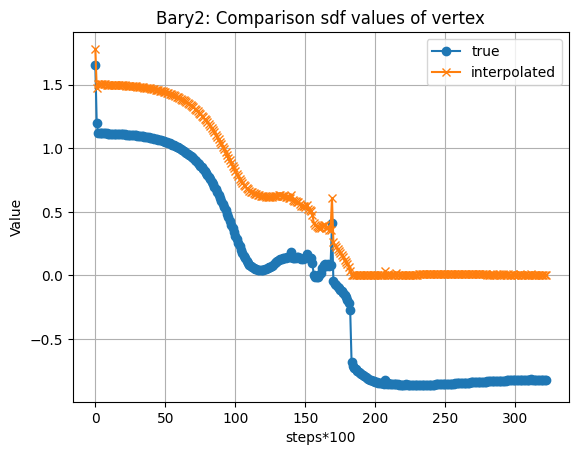

In [11]:
plot_values(true_vertex_values_2, interpolated_vertex_values_2, title='Bary2: Comparison sdf values of vertex', xlabel='steps*100', ylabel='Value', list1_label='true', list2_label='interpolated')


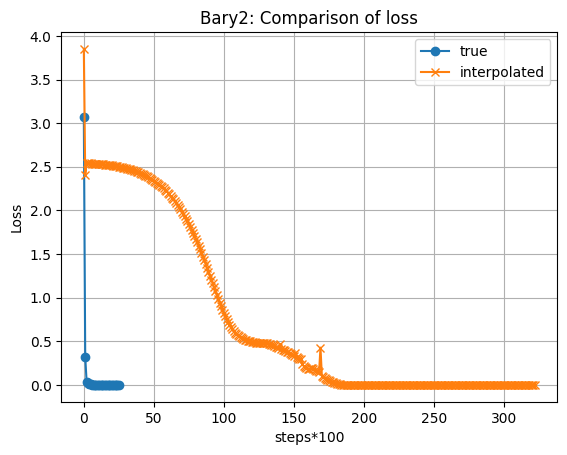

In [12]:
plot_values(true_loss_values_2, interpolated_loss_values_2, title='Bary2: Comparison of loss', xlabel='steps*100', ylabel='Loss', list1_label='true', list2_label='interpolated')


### RBF best sigma param experience  

In [2]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import gradientUtils as gu
from scipy.spatial import Voronoi

np.random.seed(0)  # Pour la reproductibilité


def estimate_best_sigma(sites, sigma_values):
    best_sigma = None
    best_error = float("inf")

    # Create the Voronoi diagram
    vor = Voronoi(sites)
    # Extract the site points from the Voronoi diagram
    points = torch.tensor(vor.points, dtype=torch.float32)

    for sigma in sigma_values:
        errors = []
        for i in range(points.shape[0] - 2):
            p1, p2, p3 = points[i], points[i + 1], points[i + 2]
            p = gu.compute_vertex_p(p1, p2, p3)
            # check if p is a vertice
            if not any(
                torch.allclose(p, torch.tensor(v, dtype=torch.float32), atol=1e-6)
                for v in vor.vertices
            ):
                # print(f'p is not a vertice')
                continue

            sdf1 = gu.circle_sdf_p(p1)
            sdf2 = gu.circle_sdf_p(p2)
            sdf3 = gu.circle_sdf_p(p3)

            predicted_sdf = gu.radial_basis_function(
                p, p1, p2, p3, sdf1, sdf2, sdf3, sigma
            )
            actual_sdf = gu.circle_sdf_p(p)

            errors.append(mean_squared_error([actual_sdf], [predicted_sdf.item()]))

        if len(errors) == 0:
            continue
        avg_error = sum(errors) / len(errors)

        if avg_error < best_error:
            best_error = avg_error
            best_sigma = sigma
            print(f"New best sigma found: {best_sigma}, error: {best_error}")

    return best_sigma


# Generate random points to serve as the sites for the Voronoi diagram
num_sites = 10
sites = np.random.rand(num_sites, 2) * 40 - 20  # Random points in the range [-20, 20]

# Example usage
sigma_values = [
    0.01,
    0.05,
    0.1,
    0.5,
    0.75,
    1.0,
    1.25,
    2.5,
    2.75,
    2.0,
    3.0,
    3.3,
    3.4,
    3.45,
    3.5,
    3.51,
    3.52,
    3.55,
    3.6,
    3.7,
    3.8,
    4.0,
    5.0,
]

best_sigma = estimate_best_sigma(sites, sigma_values)
print(f"Best sigma value: {best_sigma}")

points = [[1.0, 1.0], [3.0, 1.0], [3.0, 3.0]]
best_sigma = estimate_best_sigma(points, sigma_values)
print(f"Best sigma value for custom 3 sites: {best_sigma}")

points = [[1.0, 1.0], [3.0, 1.0], [2.0, 3.0]]
best_sigma_2 = estimate_best_sigma(points, sigma_values)
print(f"Best sigma value for custom 3 sites: {best_sigma_2}")

New best sigma found: 0.01, error: 13.19795028111912
New best sigma found: 0.75, error: 13.197950281115954
New best sigma found: 1.0, error: 13.197947491967115
New best sigma found: 1.25, error: 13.19637566697797
New best sigma found: 2.5, error: 6.873056746145053
New best sigma found: 2.75, error: 3.9375085344391323
New best sigma found: 3.0, error: 1.542759106258984
New best sigma found: 3.3, error: 0.0761464039219959
New best sigma found: 3.4, error: 0.0028839172642278754
Best sigma value: 3.4
New best sigma found: 0.01, error: 3.3431455734922224
New best sigma found: 0.5, error: 3.336010831250085
New best sigma found: 0.75, error: 2.7629110820244662
New best sigma found: 1.0, error: 1.0834585236008856
New best sigma found: 1.25, error: 0.0443065370345721
Best sigma value for custom 3 sites: 1.25
New best sigma found: 0.01, error: 2.747427270886874
New best sigma found: 0.5, error: 2.7143643646012774
New best sigma found: 0.75, error: 1.78311976480936
New best sigma found: 1.0, erro

### RBF interpolation

In [14]:
def rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values):
    # Define the optimizer
    optimizer = torch.optim.Adam([p1, p2, p3], lr=learning_rate)
    prev_loss = float("inf")

    # Optimization loop
    for step in range(max_steps):
        optimizer.zero_grad()

        sdf_p1 = gu.circle_sdf(p1[0], p1[1], circle_center, radius)
        sdf_p2 = gu.circle_sdf(p2[0], p2[1], circle_center, radius)
        sdf_p3 = gu.circle_sdf(p3[0], p3[1], circle_center, radius)
        # Compute the point (x, y) from the source points and weights
        p = gu.compute_vertex_p(p1, p2, p3)
        # Calculate the SDF value at the current point
        vertex_loss = gu.radial_basis_function(p, p1, p2, p3, sdf_p1, sdf_p2, sdf_p3, sigma)

        print(f"Vertex Loss: {vertex_loss.item()}")
        print(
            f"difference between interpole and true sdf: {vertex_loss - gu.circle_sdf_p(p, circle_center, radius)}"
        )

        # Calculate the SDF values of the midpoints
        midpoint_loss = gu.midpoint_interpolation_sdf(sdf_p1, sdf_p2, sdf_p3) ** 2

        # Define the loss as the squared distance
        loss = vertex_loss **2 + mp_lambda * midpoint_loss

        # Early stopping condition
        if abs(prev_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {step} due to minimal loss change")
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
            break

        prev_loss = loss.item()
        # Backpropagation
        loss.backward()

        # Optimization step
        optimizer.step()

        interpolated_vertex_values.append(vertex_loss.item())
        true_vertex_values.append(
            gu.circle_sdf(p[0].item(), p[1].item(), circle_center, radius).item()
        )
        interpolated_loss_values.append(loss.item())

        # Print progress every 100 steps
        if step % 100 == 0:
            print(
                f"Step {step}, Point: {p[0].item(),p[1].item()}, Loss: {loss.item()}, distance: {vertex_loss.item()}"
            )
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
    gu.plot_and_save(step, p1, p2, p3, circle_center, radius, destination=destination)
    



In [15]:
import torch
import gradientUtils as gu

circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.5
threshold = 1e-10
sigma = best_sigma
learning_rate = 0.01
max_steps = 10000
# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([3.0, 3.0], requires_grad=True)
destination = "images/autograd/sdf_rbf/"

interpolated_vertex_values = []
true_vertex_values = []
interpolated_loss_values = []

rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values)

# Final optimized point
x, y = gu.compute_vertex(p1, p2, p3)
print(f"Optimized Point: {x.item(),y.item()}")
print(f"Optimized p1: {p1.detach().numpy()}")
print(f"Optimized p2: {p2.detach().numpy()}")
print(f"Optimized p3: {p3.detach().numpy()}")

Vertex Loss: 1.6179358959197998
difference between interpole and true sdf: -0.21049118041992188
Step 0, Point: (2.0, 2.0), Loss: 10.580578804016113, distance: 1.6179358959197998
Vertex Loss: 1.5732133388519287
difference between interpole and true sdf: -0.2552487850189209
Vertex Loss: 1.5289971828460693
difference between interpole and true sdf: -0.2995617389678955
Vertex Loss: 1.4853591918945312
difference between interpole and true sdf: -0.34334707260131836
Vertex Loss: 1.4423668384552002
difference between interpole and true sdf: -0.38652944564819336
Vertex Loss: 1.4000880718231201
difference between interpole and true sdf: -0.4290287494659424
Vertex Loss: 1.3585872650146484
difference between interpole and true sdf: -0.470766544342041
Vertex Loss: 1.3179254531860352
difference between interpole and true sdf: -0.5116674900054932
Vertex Loss: 1.2781612873077393
difference between interpole and true sdf: -0.5516564846038818
Vertex Loss: 1.2393501996994019
difference between interpole 

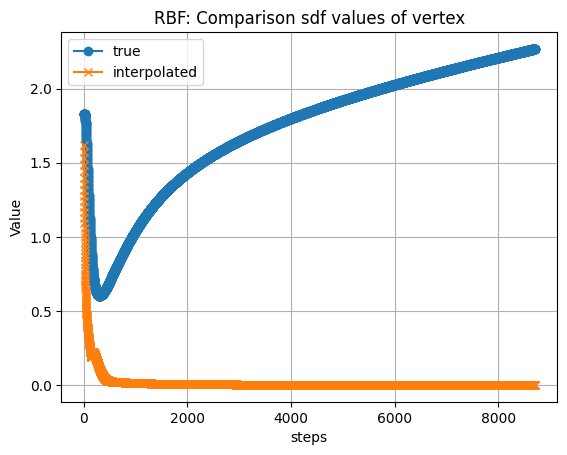

In [16]:
plot_values(true_vertex_values, interpolated_vertex_values, title='RBF: Comparison sdf values of vertex', xlabel='steps', ylabel='Value', list1_label='true', list2_label='interpolated')


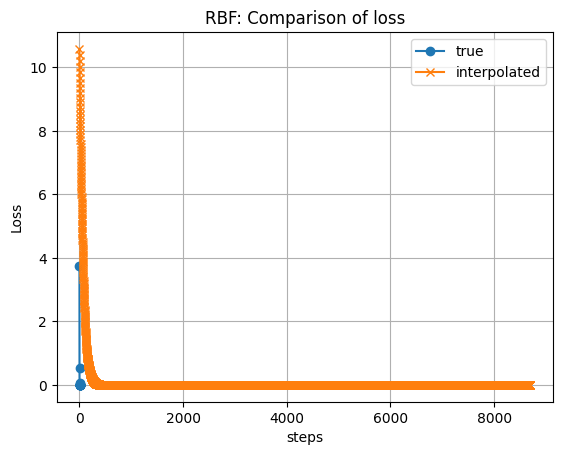

In [17]:
plot_values(true_loss_values, interpolated_loss_values, title='RBF: Comparison of loss', xlabel='steps', ylabel='Loss', list1_label='true', list2_label='interpolated')


In [18]:
import torch
import gradientUtils as gu
circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.5
threshold = 1e-10
sigma = best_sigma_2
learning_rate = 0.01
max_steps = 10000

# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([2.0, 3.0], requires_grad=True)

destination = "images/autograd/sdf_rbf_2/"

interpolated_vertex_values_2 = []
true_vertex_values_2 = []
interpolated_loss_values_2 = []

rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values_2, interpolated_vertex_values_2, true_vertex_values_2)

# Final optimized point
x,y = gu.compute_vertex(p1, p2, p3)
print(f'Optimized Point: {x.item(),y.item()}')
print(f'Optimized p1: {p1.detach().numpy()}')
print(f'Optimized p2: {p2.detach().numpy()}')
print(f'Optimized p3: {p3.detach().numpy()}')

Vertex Loss: 1.9063669443130493
difference between interpole and true sdf: 0.24883043766021729
Step 0, Point: (2.0, 1.75), Loss: 10.376615524291992, distance: 1.9063669443130493
Vertex Loss: 1.8747673034667969
difference between interpole and true sdf: 0.2231128215789795
Vertex Loss: 1.8434267044067383
difference between interpole and true sdf: 0.19765973091125488
Vertex Loss: 1.8123698234558105
difference between interpole and true sdf: 0.17249655723571777
Vertex Loss: 1.781623363494873
difference between interpole and true sdf: 0.14764785766601562
Vertex Loss: 1.7512104511260986
difference between interpole and true sdf: 0.12313556671142578
Vertex Loss: 1.7211511135101318
difference between interpole and true sdf: 0.09898042678833008
Vertex Loss: 1.6914656162261963
difference between interpole and true sdf: 0.07520174980163574
Vertex Loss: 1.6621720790863037
difference between interpole and true sdf: 0.05181765556335449
Vertex Loss: 1.633288025856018
difference between interpole and 

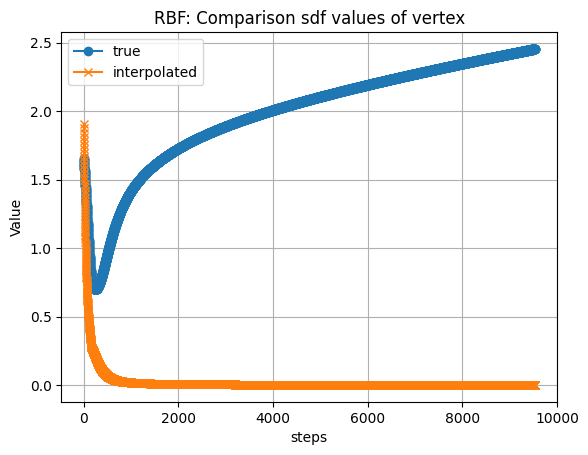

In [19]:
plot_values(true_vertex_values_2, interpolated_vertex_values_2, title='RBF: Comparison sdf values of vertex', xlabel='steps', ylabel='Value', list1_label='true', list2_label='interpolated')


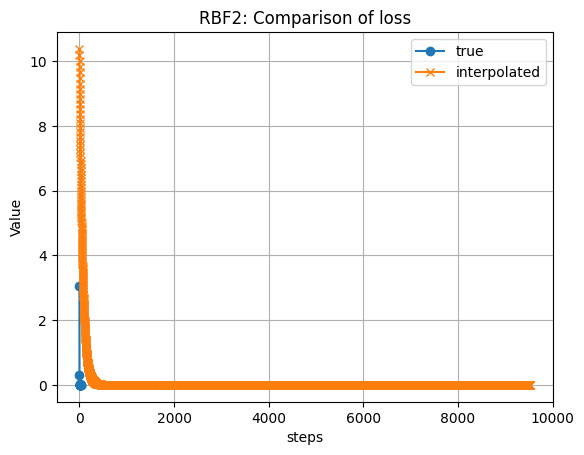

In [20]:
plot_values(true_loss_values_2, interpolated_loss_values_2, title='RBF2: Comparison of loss', xlabel='steps', ylabel='Value', list1_label='true', list2_label='interpolated')


### Barycentric and RBF interpolation

In [13]:
def bary_rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values):
    # Define the optimizer
    optimizer = torch.optim.Adam([p1, p2, p3], lr=learning_rate)
    prev_loss = float("inf")

    # Optimization loop
    for step in range(max_steps):
        optimizer.zero_grad()

        sdf_p1 = gu.circle_sdf(p1[0], p1[1], circle_center, radius)
        sdf_p2 = gu.circle_sdf(p2[0], p2[1], circle_center, radius)
        sdf_p3 = gu.circle_sdf(p3[0], p3[1], circle_center, radius)
        # Compute the point (x, y) from the source points and weights
        p = gu.compute_vertex_p(p1, p2, p3)
        # Calculate the SDF value at the current point
        #vertex_loss = gu.radial_basis_function(p, p1, p2, p3, sdf_p1, sdf_p2, sdf_p3, sigma)
        #vertex_loss = (u * sdf_p1 + v * sdf_p2 + w * sdf_p3) ** 2
        vertex_loss = gu.bary_rbf(p, p1, p2, p3, sdf_p1, sdf_p2, sdf_p3, sigma)

        

        # Calculate the SDF values of the midpoints
        midpoint_loss = gu.midpoint_interpolation_sdf(sdf_p1, sdf_p2, sdf_p3) ** 2

        # Define the loss as the squared distance
        loss = vertex_loss **2 + mp_lambda * midpoint_loss

        # Early stopping condition
        if abs(prev_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {step} due to minimal loss change")
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
            break

        prev_loss = loss.item()
        # Backpropagation
        loss.backward()

        # Optimization step
        optimizer.step()

        interpolated_vertex_values.append(vertex_loss.item())
        true_vertex_values.append(
            gu.circle_sdf(p[0].item(), p[1].item(), circle_center, radius).item()
        )
        interpolated_loss_values.append(loss.item())

        # Print progress every 100 steps
        if step % 100 == 0:
            print(f"Vertex Loss: {vertex_loss.item()}")
            print(
            f"difference between interpole and true sdf: {vertex_loss - gu.circle_sdf_p(p, circle_center, radius)}"
            )
            print(
                f"Step {step}, Point: {p[0].item(),p[1].item()}, Loss: {loss.item()}, distance: {vertex_loss.item()}"
            )
            gu.plot_and_save(
                step, p1, p2, p3, circle_center, radius, destination=destination
            )
    gu.plot_and_save(step, p1, p2, p3, circle_center, radius, destination=destination)


In [4]:
import torch
import gradientUtils as gu

circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.5
threshold = 1e-10
sigma = best_sigma
learning_rate = 0.001
max_steps = 10000
# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([3.0, 3.0], requires_grad=True)
#p3 = torch.tensor([2.0, 3.0], requires_grad=True)

destination = "images/autograd/bary_rbf/"

interpolated_vertex_values = []
true_vertex_values = []
interpolated_loss_values = []


bary_rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values, interpolated_vertex_values, true_vertex_values)


# Final optimized point
x, y = gu.compute_vertex(p1, p2, p3)
print(f"Optimized Point: {x.item(),y.item()}")
print(f"Optimized p1: {p1.detach().numpy()}")
print(f"Optimized p2: {p2.detach().numpy()}")
print(f"Optimized p3: {p3.detach().numpy()}")

Vertex Loss: 1.8284270763397217
difference between interpole and true sdf: 0.0
Step 0, Point: (2.0, 2.0), Loss: 11.306008338928223, distance: 1.8284270763397217
Vertex Loss: 1.242180585861206
difference between interpole and true sdf: -0.570591926574707
Step 100, Point: (1.9016928672790527, 2.0724995136260986), Loss: 8.948568344116211, distance: 1.242180585861206
Vertex Loss: 0.9659883975982666
difference between interpole and true sdf: -0.82615065574646
Step 200, Point: (1.8009347915649414, 2.133699655532837), Loss: 7.741735458374023, distance: 0.9659883975982666
Vertex Loss: 0.7864863872528076
difference between interpole and true sdf: -0.9611504077911377
Step 300, Point: (1.6993790864944458, 2.159078359603882), Loss: 6.766417980194092, distance: 0.7864863872528076
Vertex Loss: 0.6670625805854797
difference between interpole and true sdf: -1.0166051387786865
Step 400, Point: (1.5979108810424805, 2.1560966968536377), Loss: 5.908380508422852, distance: 0.6670625805854797
Vertex Loss: 0

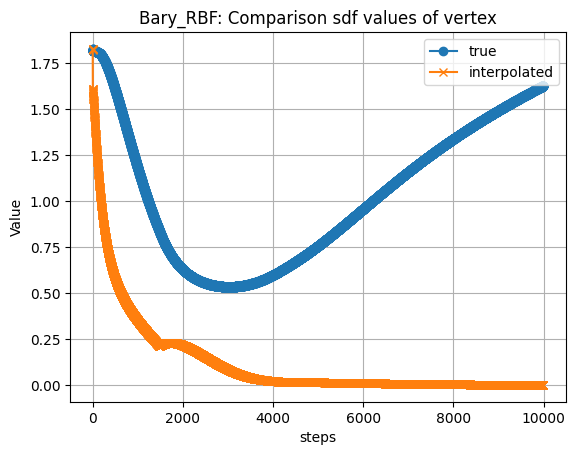

In [14]:
plot_values(true_vertex_values, interpolated_vertex_values, title='Bary_RBF: Comparison sdf values of vertex', xlabel='steps', ylabel='Value', list1_label='true', list2_label='interpolated')


In [15]:
plot_values(true_loss_values, interpolated_loss_values, title='Bary_RBF: Comparison of loss', xlabel='steps', ylabel='Loss', list1_label='true', list2_label='interpolated')


NameError: name 'true_loss_values' is not defined

In [16]:
import torch
import gradientUtils as gu

circle_center = torch.tensor([0.0, 0.0])  # Example circle center
radius = 1.0  # Example radius
mp_lambda = 0.5
threshold = 1e-10
sigma = best_sigma_2
learning_rate = 0.001
max_steps = 10000
# Initialize the source points (p1, p2, p3) as PyTorch tensors
p1 = torch.tensor([1.0, 1.0], requires_grad=True)
p2 = torch.tensor([3.0, 1.0], requires_grad=True)
p3 = torch.tensor([2.0, 3.0], requires_grad=True)

destination = "images/autograd/bary_rbf_2/"

interpolated_vertex_values_2 = []
true_vertex_values_2 = []
interpolated_loss_values_2 = []


bary_rbf_optimizer(p1, p2, p3, circle_center, radius, destination, sigma, learning_rate, max_steps, threshold, interpolated_loss_values_2, interpolated_vertex_values_2, true_vertex_values_2)


# Final optimized point
x, y = gu.compute_vertex(p1, p2, p3)
print(f"Optimized Point: {x.item(),y.item()}")
print(f"Optimized p1: {p1.detach().numpy()}")
print(f"Optimized p2: {p2.detach().numpy()}")
print(f"Optimized p3: {p3.detach().numpy()}")

Vertex Loss: 1.7822351455688477
difference between interpole and true sdf: 0.12469863891601562
Step 0, Point: (2.0, 1.75), Loss: 9.918742179870605, distance: 1.7822351455688477
Vertex Loss: 1.6476633548736572
difference between interpole and true sdf: 0.12980103492736816
Step 100, Point: (1.9005094766616821, 1.6515733003616333), Loss: 8.529977798461914, distance: 1.6476633548736572
Vertex Loss: 1.5161190032958984
difference between interpole and true sdf: 0.13389062881469727
Step 200, Point: (1.8024908304214478, 1.5575748682022095), Loss: 7.294511318206787, distance: 1.5161190032958984
Vertex Loss: 1.387705683708191
difference between interpole and true sdf: 0.13691651821136475
Step 300, Point: (1.7061187028884888, 1.4680637121200562), Loss: 6.200235843658447, distance: 1.387705683708191
Vertex Loss: 1.2625641822814941
difference between interpole and true sdf: 0.13893461227416992
Step 400, Point: (1.6116106510162354, 1.382936716079712), Loss: 5.234819412231445, distance: 1.26256418228

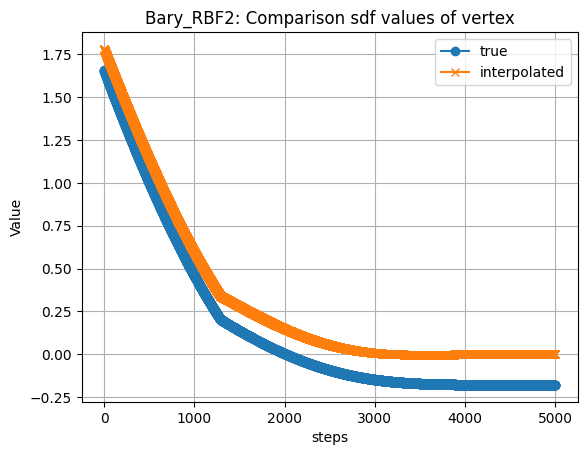

In [17]:
plot_values(true_vertex_values_2, interpolated_vertex_values_2, title='Bary_RBF2: Comparison sdf values of vertex', xlabel='steps', ylabel='Value', list1_label='true', list2_label='interpolated')


In [18]:
plot_values(true_loss_values_2, interpolated_loss_values_2, title='Bary_RBF2: Comparison of loss', xlabel='steps', ylabel='Loss', list1_label='true', list2_label='interpolated')


NameError: name 'true_loss_values_2' is not defined